# Haaste: Tekstin analysointi datatieteestä

Tässä esimerkissä teemme yksinkertaisen harjoituksen, joka kattaa kaikki perinteisen datatieteen prosessin vaiheet. Sinun ei tarvitse kirjoittaa mitään koodia, voit vain klikata alla olevia soluja suorittaaksesi ne ja tarkkailla tuloksia. Haasteena sinua kannustetaan kokeilemaan tätä koodia eri datalla.

## Tavoite

Tässä oppitunnissa olemme käsitelleet erilaisia datatieteeseen liittyviä käsitteitä. Yritetään löytää lisää aiheeseen liittyviä käsitteitä tekemällä **tekstin louhintaa**. Aloitamme tekstillä, joka käsittelee datatiedettä, poimimme siitä avainsanoja ja yritämme sitten visualisoida tulokset.

Tekstinä käytän Wikipedia-sivua, joka käsittelee datatiedettä:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Vaihe 1: Datan hankkiminen

Ensimmäinen vaihe jokaisessa data-analytiikan prosessissa on datan hankkiminen. Käytämme siihen `requests`-kirjastoa:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Vaihe 2: Datan muuntaminen

Seuraava vaihe on muuntaa data käsittelyyn sopivaan muotoon. Meidän tapauksessamme olemme ladanneet HTML-lähdekoodin sivulta, ja meidän täytyy muuntaa se pelkäksi tekstiksi.

Tähän on monia tapoja. Käytämme yksinkertaisinta sisäänrakennettua [HTMLParser](https://docs.python.org/3/library/html.parser.html)-objektia Pythonista. Meidän täytyy periä `HTMLParser`-luokka ja määritellä koodi, joka kerää kaiken tekstin HTML-tägien sisältä, lukuun ottamatta `<script>`- ja `<style>`-tageja.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Vaihe 3: Näkemyksien saaminen

Tärkein vaihe on muuttaa data sellaiseen muotoon, josta voimme saada näkemyksiä. Meidän tapauksessamme haluamme poimia avainsanoja tekstistä ja nähdä, mitkä avainsanat ovat merkityksellisempiä.

Käytämme Python-kirjastoa nimeltä [RAKE](https://github.com/aneesha/RAKE) avainsanojen poimintaan. Asennetaan ensin tämä kirjasto, jos se ei ole jo asennettuna:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Päätoiminnallisuus on saatavilla `Rake`-objektista, jota voimme mukauttaa joillakin parametreilla. Meidän tapauksessamme asetamme avainsanan vähimmäispituudeksi 5 merkkiä, avainsanan vähimmäisesiintymistiheydeksi dokumentissa 3 ja avainsanan enimmäissanamääräksi 2. Voit vapaasti kokeilla muita arvoja ja tarkkailla tulosta.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Saimme luettelon termeistä yhdessä niiden tärkeysasteen kanssa. Kuten huomaat, tärkeimmät alat, kuten koneoppiminen ja big data, ovat listan kärjessä.

## Vaihe 4: Tulosten visualisointi

Ihmiset ymmärtävät dataa parhaiten visuaalisessa muodossa. Siksi datan visualisointi voi usein auttaa saamaan uusia oivalluksia. Voimme käyttää Pythonin `matplotlib`-kirjastoa piirtääksemme yksinkertaisen avainsanojen jakautuman niiden merkityksen mukaan:


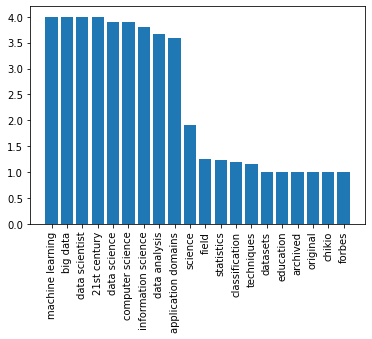

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

On kuitenkin vielä parempi tapa visualisoida sanan frekvenssejä - käyttämällä **Word Cloudia**. Meidän täytyy asentaa toinen kirjasto, jotta voimme piirtää sanapilven avainsanalistastamme.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-objekti vastaa joko alkuperäisen tekstin tai valmiiksi lasketun sanalistan ja niiden frekvenssien vastaanottamisesta, ja palauttaa kuvan, joka voidaan sitten näyttää käyttämällä `matplotlib`:


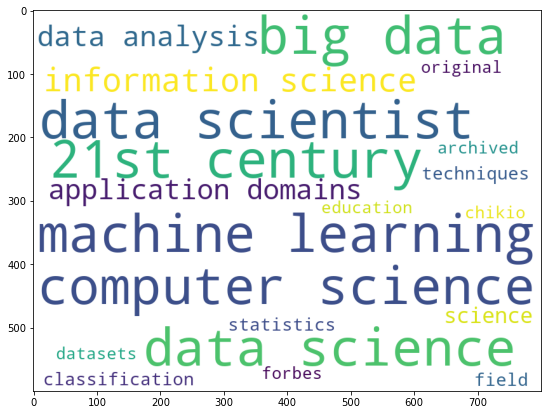

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Voimme myös syöttää alkuperäisen tekstin `WordCloud`-luokkaan - katsotaan, pystymmekö saamaan samanlaisen tuloksen:


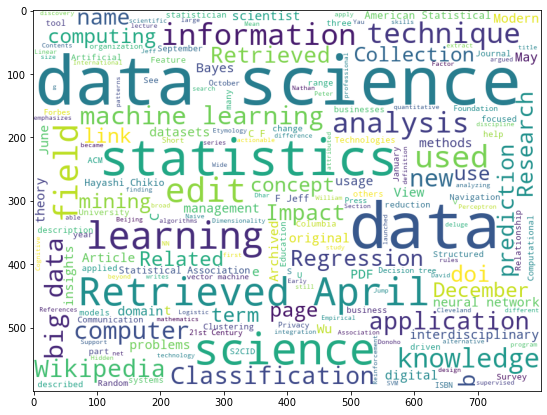

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Voit nähdä, että sanapilvi näyttää nyt vaikuttavammalta, mutta siinä on myös paljon hälyä (esim. epäolennaisia sanoja kuten `Retrieved on`). Lisäksi saamme vähemmän avainsanoja, jotka koostuvat kahdesta sanasta, kuten *data scientist* tai *computer science*. Tämä johtuu siitä, että RAKE-algoritmi tekee paljon paremman työn hyvien avainsanojen valinnassa tekstistä. Tämä esimerkki havainnollistaa, kuinka tärkeää on esikäsitellä ja puhdistaa dataa, sillä selkeä lopputulos auttaa meitä tekemään parempia päätöksiä.

Tässä harjoituksessa kävimme läpi yksinkertaisen prosessin, jossa Wikipedia-tekstistä saatiin irti merkitystä avainsanojen ja sanapilven muodossa. Tämä esimerkki on melko yksinkertainen, mutta se havainnollistaa hyvin kaikki tyypilliset vaiheet, joita data-analyytikko käy läpi työskennellessään datan parissa, alkaen datan hankinnasta aina visualisointiin asti.

Kurssillamme käymme kaikki nämä vaiheet yksityiskohtaisesti läpi.



---

**Vastuuvapauslauseke**:  
Tämä asiakirja on käännetty käyttämällä tekoälypohjaista käännöspalvelua [Co-op Translator](https://github.com/Azure/co-op-translator). Vaikka pyrimme tarkkuuteen, huomioithan, että automaattiset käännökset voivat sisältää virheitä tai epätarkkuuksia. Alkuperäinen asiakirja sen alkuperäisellä kielellä tulisi pitää ensisijaisena lähteenä. Kriittisen tiedon osalta suositellaan ammattimaista ihmiskäännöstä. Emme ole vastuussa väärinkäsityksistä tai virhetulkinnoista, jotka johtuvat tämän käännöksen käytöstä.
